#**Multiple Linear Regression (MLR)**

***Prepared by:*** [**Manisa Pipattanasomporn**](https://mpipatta.github.io)

*Created: January 1, 2020*

One of the most basic ML is multiple linear regression. In this tutorial, we will use MLR to perform hour-ahead load forecasting when Lt-1, t_outdoor and others are inputs to the forecasting model.

We will use this library:

*   from sklearn.linear_model import LinearRegression




---



# **1. Load data**

This notebook will work with "Bangkok.csv", the electrical consumption of a building at one-hour intervals for one year.

In [0]:
# We will use the following Python libraries: Pandas, Numpy and Matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url ='https://raw.githubusercontent.com/mpipatta/mpipatta.github.io/master/testdata/Bangkok.csv'
df = pd.read_csv(url, index_col=[0], parse_dates=[0])
df.head(5)
#We will parse the first column (col=[0]) as the index column as the date. 
#The 'Load' column will be saved in the dataframe df.
#Note: the 'Load' is in kilo-Watt (kW).

,Load,Outdoor,Humidity,Pressure,Solar
Time,,,,,
2016-01-01 00:00:00,4.30,80.5,67.80,30.02,0.0
2016-01-01 01:00:00,4.12,79.2,68.00,30.03,0.0
2016-01-01 02:00:00,4.06,79.1,68.20,30.03,0.0
2016-01-01 03:00:00,4.44,79.0,68.35,30.03,0.0
2016-01-01 04:00:00,3.88,78.8,68.50,30.03,0.0


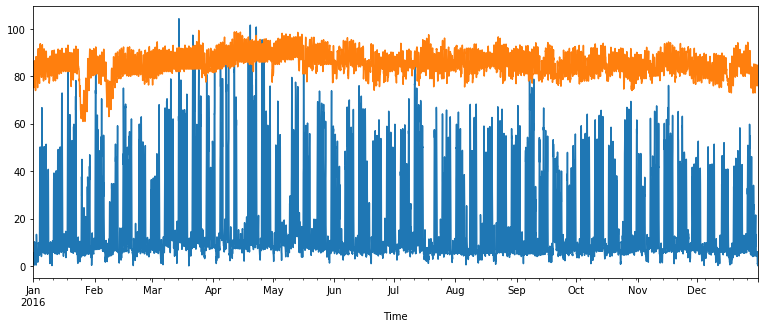

In [4]:
df['Load'].plot(figsize=(13,5))
df['Outdoor'].plot()

#**2. Data Exploration**
Let us now visualize the data, and the relationships among different variables.

In [6]:
df['Lt-1'] = df['Load'].shift(1)
df

,Load,Outdoor,Humidity,Pressure,Solar,Lt-1
Time,,,,,,
2016-01-01 00:00:00,4.30,80.5,67.80,30.02,0.0,NaN
2016-01-01 01:00:00,4.12,79.2,68.00,30.03,0.0,4.30
2016-01-01 02:00:00,4.06,79.1,68.20,30.03,0.0,4.12
2016-01-01 03:00:00,4.44,79.0,68.35,30.03,0.0,4.06
2016-01-01 04:00:00,3.88,78.8,68.50,30.03,0.0,4.44
...,...,...,...,...,...,...
2016-12-31 19:00:00,3.49,82.0,59.00,29.89,0.0,3.38
2016-12-31 20:00:00,3.25,82.0,59.55,29.91,0.0,3.49
2016-12-31 21:00:00,3.50,81.8,61.10,29.92,0.0,3.25


Text(0, 0.5, 'Load')

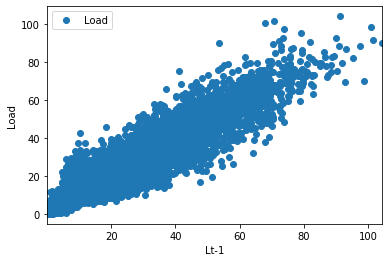

In [0]:
df.plot(x='Lt-1',y='Load',style='o')
plt.xlabel('Lt-1')
plt.ylabel('Load')

Text(0, 0.5, 'Load')

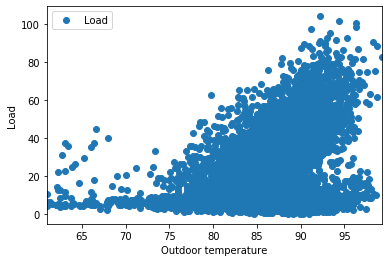

In [0]:
df.plot(x='Outdoor',y='Load',style='o')
plt.xlabel('Outdoor temperature')
plt.ylabel('Load')

Text(0, 0.5, 'Load')

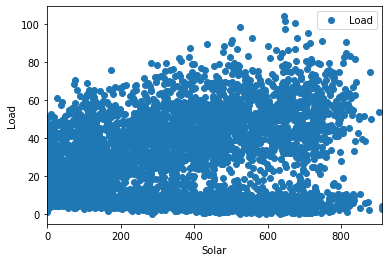

In [0]:
df.plot(x='Solar',y='Load',style='o')
plt.xlabel('Solar')
plt.ylabel('Load')

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


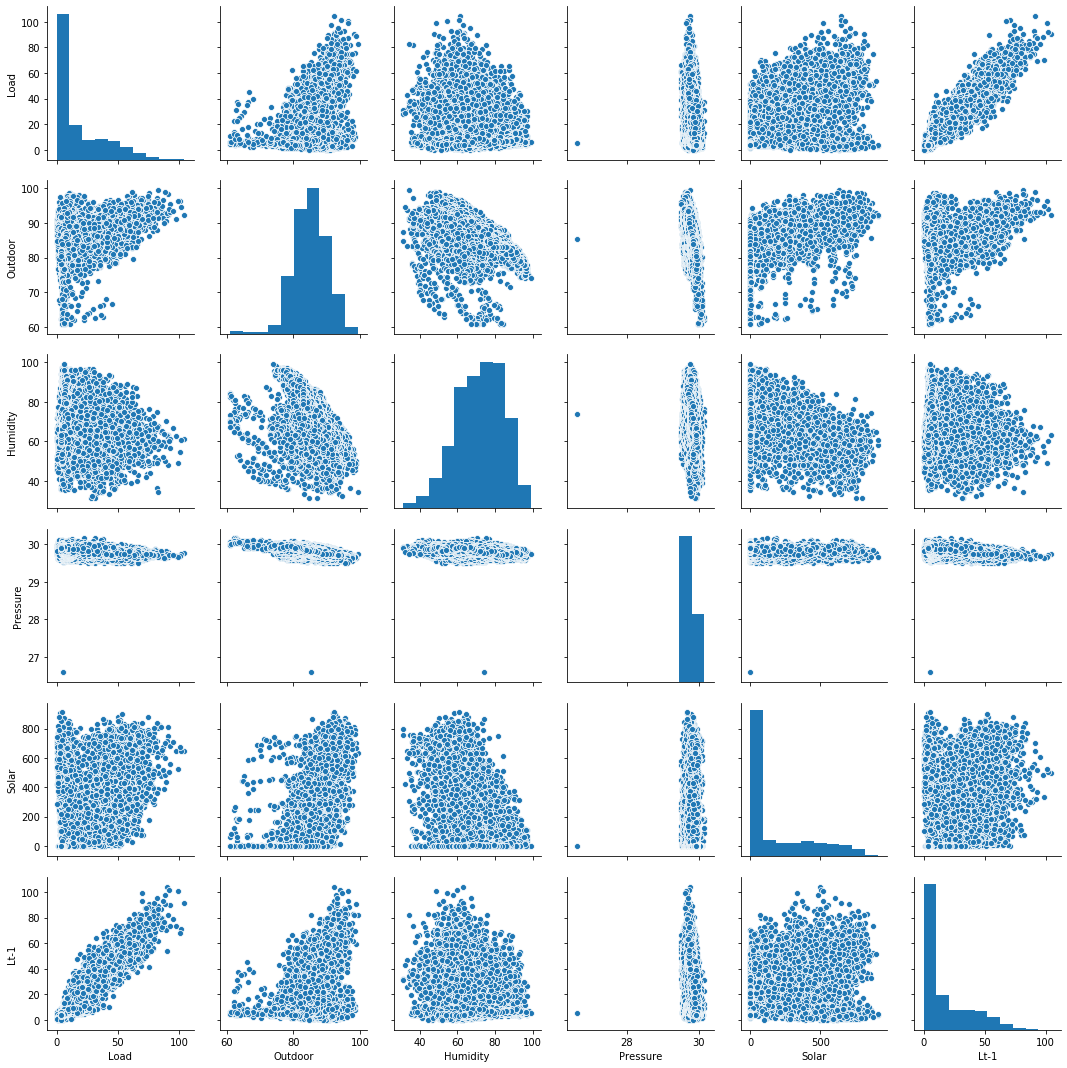

In [10]:
#instead of individual plots as shown above, we can use seaborn's pairplot.
import seaborn as sns
sns.pairplot(df)

In [0]:
fig.savefig('pic.png')

In [0]:
#Let us check correlation between load and other input parameters
df.corr()

,Load,Outdoor,Humidity,Pressure,Solar,Lt-1
Load,1.000000,0.496096,-0.353430,-0.129666,0.556277,0.946887
Outdoor,0.496096,1.000000,-0.512711,-0.381217,0.572231,0.504377
Humidity,-0.353430,-0.512711,1.000000,-0.144201,-0.544825,-0.359877
Pressure,-0.129666,-0.381217,-0.144201,1.000000,0.038438,-0.181411
Solar,0.556277,0.572231,-0.544825,0.038438,1.000000,0.468429
Lt-1,0.946887,0.504377,-0.359877,-0.181411,0.468429,1.000000


We can see that building-level load (kW) is highly dependent on Lt-1. This is followed by solar irradiation, outdoor temperature. We will explore the use of these three variables for MLR.



---


#**3. Linear Regression Model**

From sklearn.linear_model, we import LinearRegression


In [0]:
from sklearn.linear_model import LinearRegression

###**(a) Regression with one variable (Lt-1)**

In [0]:
X=df['Lt-1'].values.reshape(-1,1) #row=unknown, column=1
y=df['Load'].values 

In [16]:
#Prepare train and test data
n=int(0.8*8784)
X_train = X[1:n]
X_test  = X[n:8784]
y_train = y[1:n]
y_test  = y[n:8784]

#Create the regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

#Use the regression model to predict Lt
y_pred = regressor.predict(X_test)

#create the datafram comprising 'actual value' and 'predicted value'
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

1.0528257713844944
[0.94659495]


,Actual,Predicted
0,6.12,15.138159
1,5.88,6.845987
2,8.62,6.618804
3,8.57,9.212474
4,8.25,9.165144
...,...,...
1752,3.49,4.252317
1753,3.25,4.356442
1754,3.50,4.129259
1755,3.50,4.365908


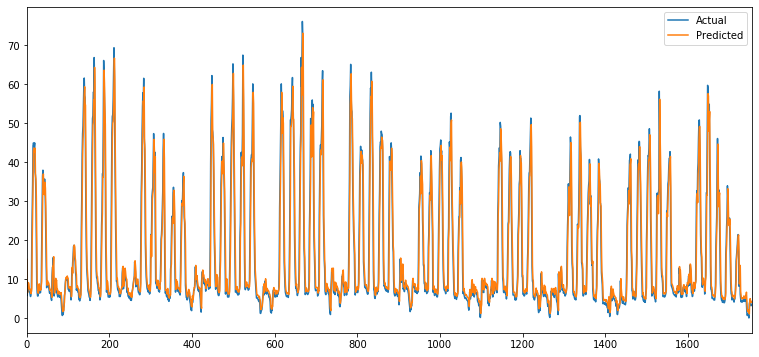

In [28]:
#visualize the results
df1.plot(figsize=(13,6))

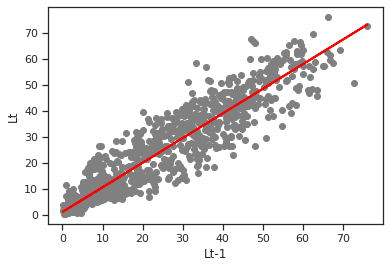

In [0]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Lt-1')
plt.ylabel('Lt')
plt.show()

In [0]:
RMSE = np.sqrt(np.mean(np.square(y_test-y_pred)))
MAPE = np.mean(np.abs((y_test-y_pred)/y_test))*100
print('RMSE=',RMSE)
print('MAPE=',MAPE)

RMSE= 5.021375928183658
MAPE= 27.14038909237652


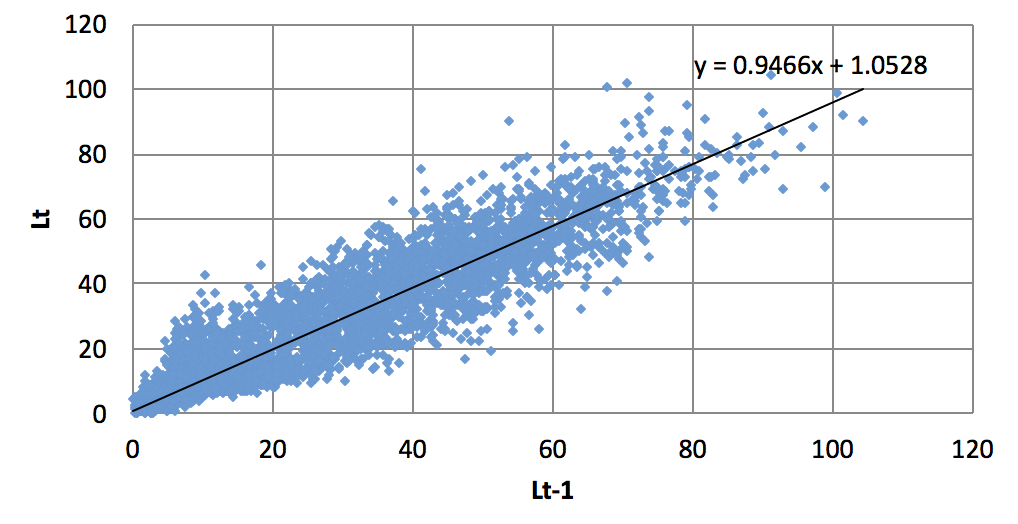

In [0]:
#Note: We can also do this in Excel and get exact same result.
from IPython.display import Image
Image("https://raw.githubusercontent.com/mpipatta/mpipatta.github.io/master/images/LR.png", width=400)

###**(b) Regression with two variables (Lt-1, Outdoor)**

In [18]:
#Let us first prepare train/test data
X=df[['Lt-1','Outdoor']].values
y=df['Load'].values
n=int(0.8*8784)
X_train = X[1:n]
X_test  = X[n:8784]
y_train = y[1:n]
y_test  = y[n:8784]

#Create the regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

#Use the regression model to predict Lt
y_pred = regressor.predict(X_test)

#create the datafram comprising 'actual value' and 'predicted value'
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2

-7.430195308466605
[0.93298164 0.10251798]


,Actual,Predicted
0,6.12,15.185053
1,5.88,6.993681
2,8.62,6.769765
3,8.57,9.223617
4,8.25,9.176968
...,...,...
1752,3.49,4.129757
1753,3.25,4.232385
1754,3.50,3.987966
1755,3.50,4.139197


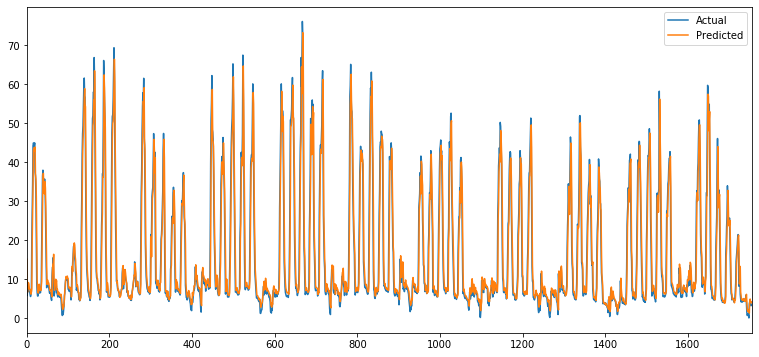

In [19]:
#visualize the results
df2.plot(figsize=(13,6))

In [0]:
RMSE = np.sqrt(np.mean(np.square(y_test-y_pred)))
MAPE = np.mean(np.abs((y_test-y_pred)/y_test))*100
print('RMSE=',RMSE)
print('MAPE=',MAPE)

RMSE= 5.026929754303876
MAPE= 26.975365081012686


###**(c) Regression with two variables (Lt-1, Outdoor and Solar)**

In [29]:
#Let us first prepare train/test data
X=df[['Lt-1','Outdoor','Solar']].values
y=df['Load'].values
n=int(0.8*8784)
X_train = X[1:n]
X_test  = X[n:8784]
y_train = y[1:n]
y_test  = y[n:8784]

#Create the regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

#Use the regression model to predict Lt
y_pred = regressor.predict(X_test)

#create the datafram comprising 'actual value' and 'predicted value'
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df3

15.060545909405533
[ 0.89086411 -0.1785639   0.01300562]


,Actual,Predicted
0,6.12,13.106531
1,5.88,5.334702
2,8.62,5.120895
3,8.57,7.740427
4,8.25,7.695883
...,...,...
1752,3.49,3.429427
1753,3.25,3.527422
1754,3.50,3.349327
1755,3.50,3.714894


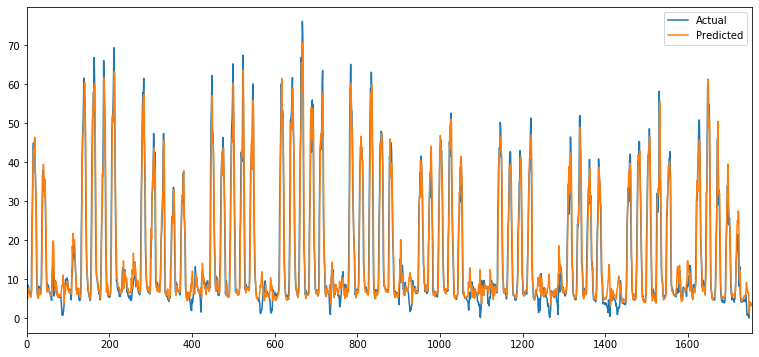

In [31]:
#visualize the results
df3.plot(figsize=(13,6))

In [0]:
RMSE = np.sqrt(np.mean(np.square(y_test-y_pred)))
MAPE = np.mean(np.abs((y_test-y_pred)/y_test))*100
print('RMSE=',RMSE)
print('MAPE=',MAPE)

RMSE= 4.536361610326898
MAPE= 42.62356742801899




---
# **Further reading:** 

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


---

